In [2]:
import os

In [5]:
os.chdir(os.path.split(os.getcwd())[0])

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
import matplotlib.style as style

In [73]:
style.use('seaborn-poster')

### Parse raw logs and create DataFrame

In [153]:
log_path = os.path.join('experiments', 'exp_clip_low_g', 'training.log')

In [154]:
with open(log_path, 'r') as f:
    log = f.read()

In [155]:
columns = ['episode', 'epsilon', 'steps', 'reward', 'best_mean_reward', 'mean_loss']
def parse_raw_log(log):
    data = []
    lines = log.split('\n')
    for line in lines[:-1]:
        data_line = []
        raw = line.split(': ')
        if raw[0].split(', ')[1] == 'LOG':
            entries = raw[1].split(', ')
            for entry in entries:
                datum = float(entry.split(':')[1])
                data_line.append(datum)
            data.append(data_line)
    
    return data

In [156]:
data = parse_raw_log(log)

In [157]:
data_df = pd.DataFrame(data, columns = columns)
data_df = data_df.astype({'episode': int, 'steps': int})

In [158]:
data_df.head()

,episode,epsilon,steps,reward,best_mean_reward,mean_loss
0,1,0.999000,50,-500.000000,-500.00000,6.358669
1,2,0.998001,50,-485.066619,-492.53331,0.980391
2,3,0.997003,50,-500.000000,-492.53331,0.359024
3,4,0.996006,50,-494.849706,-492.53331,0.232231
4,5,0.995010,50,-500.000000,-492.53331,0.161600


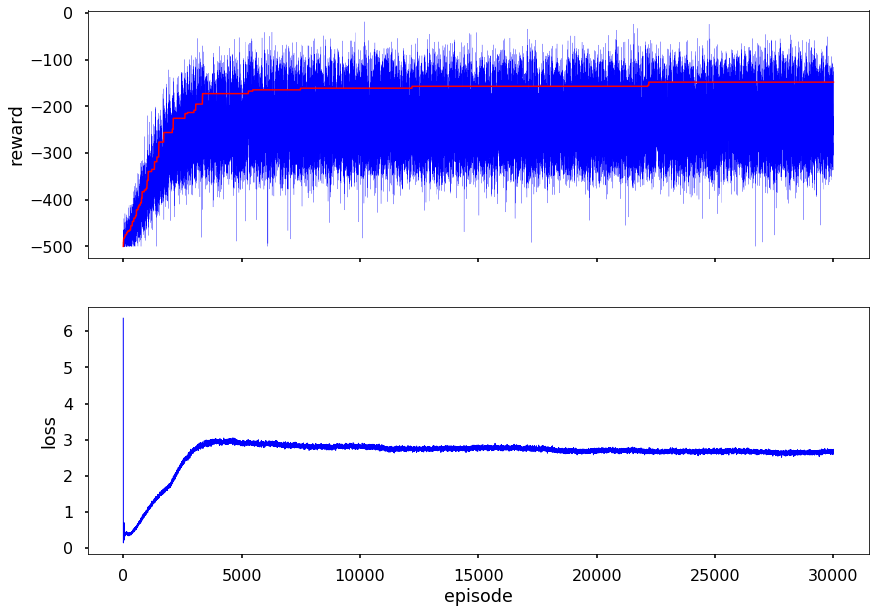

In [160]:
fig, ax = plt.subplots(figsize = (14, 10), nrows = 2, ncols = 1, sharex = True)
ax[0].plot(data_df['episode'], np.clip(data_df['reward'], -np.inf, None), label = 'reward', color = 'blue', lw = 0.2)
ax[0].plot(data_df['episode'], data_df['best_mean_reward'], label = 'best_mean_reward', color = 'red', lw = 1.5)
ax[0].set_ylabel('reward')

ax[1].plot(data_df['mean_loss'], label = 'loss', color = 'blue', lw = 1)
ax[1].set_xlabel('episode')
ax[1].set_ylabel('loss')
plt.show()